# Linear Regression Model

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle

In [235]:
data = pd.read_csv("./train_data.csv")

## Exploratory Data Analysis

In [236]:
data.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [237]:
data.shape

(4398, 13)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [239]:
data.duplicated().sum()

0

#### if there duplicate, drop them

In [240]:
# data.drop_duplicates()

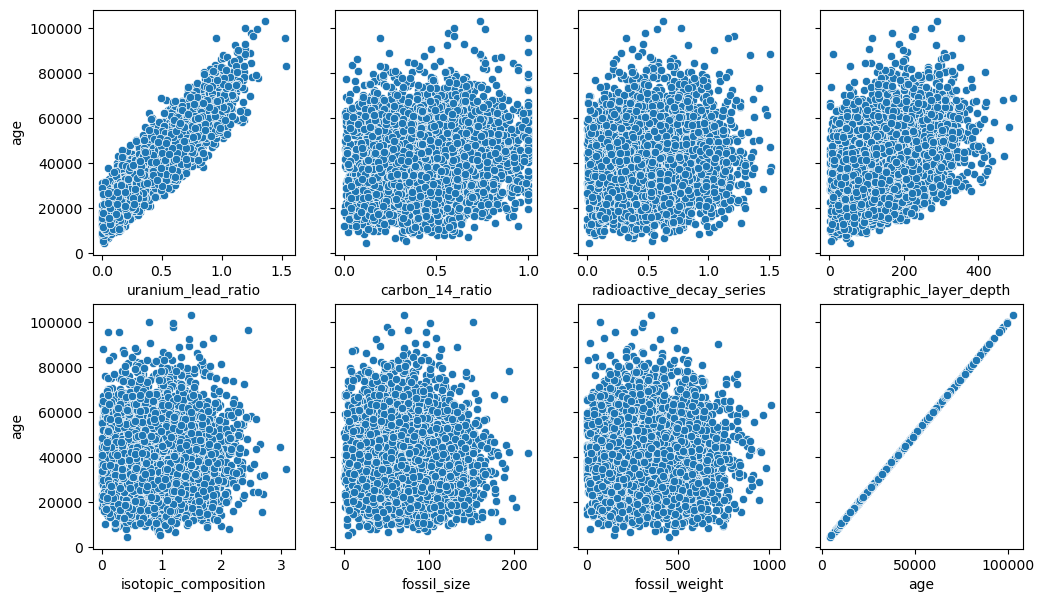

In [241]:
data_numericalFeatures = data.select_dtypes(exclude = ['object', 'bool']).columns.tolist()
fig, ax = plt.subplots(2, 4, figsize = (12, 7), sharey = True)
ax = ax.ravel()

for i, feature in enumerate(data_numericalFeatures):
        sns.scatterplot(x = feature, y = 'age', data = data, ax = ax[i])

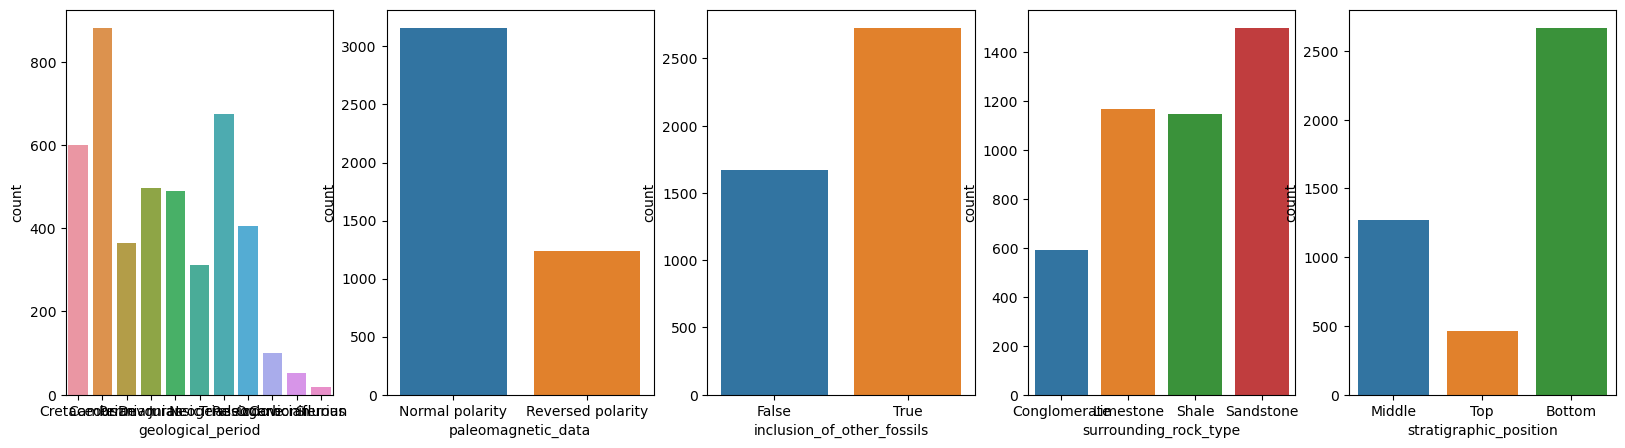

In [242]:
data_categorigalFeatures = data.select_dtypes(include = ['object', 'bool']).columns.tolist()
fig, ax = plt.subplots(1, len(data_categorigalFeatures), figsize = (20, 5))
ax = ax.ravel()

for i, feature in enumerate(data_categorigalFeatures):
    sns.countplot(data = data, x = feature, ax = ax[i])

In [243]:
data['geological_period'].unique(), data['geological_period'].value_counts()


(array(['Cretaceous', 'Cambrian', 'Permian', 'Devonian', 'Jurassic',
        'Neogene', 'Triassic', 'Paleogene', 'Ordovician', 'Carboniferous',
        'Silurian'], dtype=object),
 geological_period
 Cambrian         882
 Triassic         676
 Cretaceous       601
 Devonian         498
 Jurassic         490
 Paleogene        405
 Permian          365
 Neogene          311
 Ordovician       100
 Carboniferous     52
 Silurian          18
 Name: count, dtype: int64)

### Check for Outliers

#### Box plot

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_10624\1344606536.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


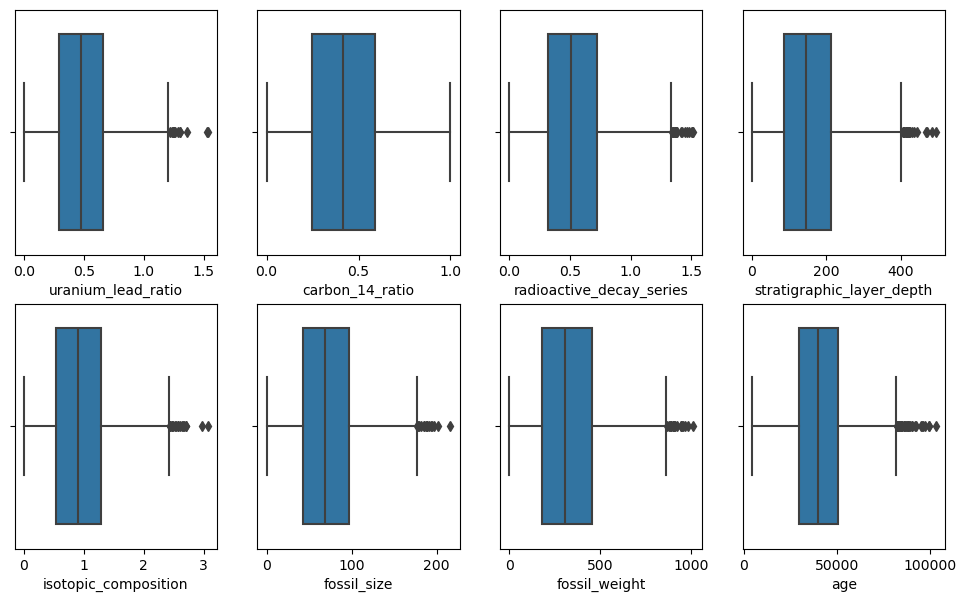

In [244]:
fig, ax = plt.subplots(2, 4, figsize = (12, 7))
ax = ax.ravel()

for i, feature in enumerate(data_numericalFeatures):
    sns.boxplot(x = feature, data = data, ax = ax[i])
fig.show()

#### histogram

c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

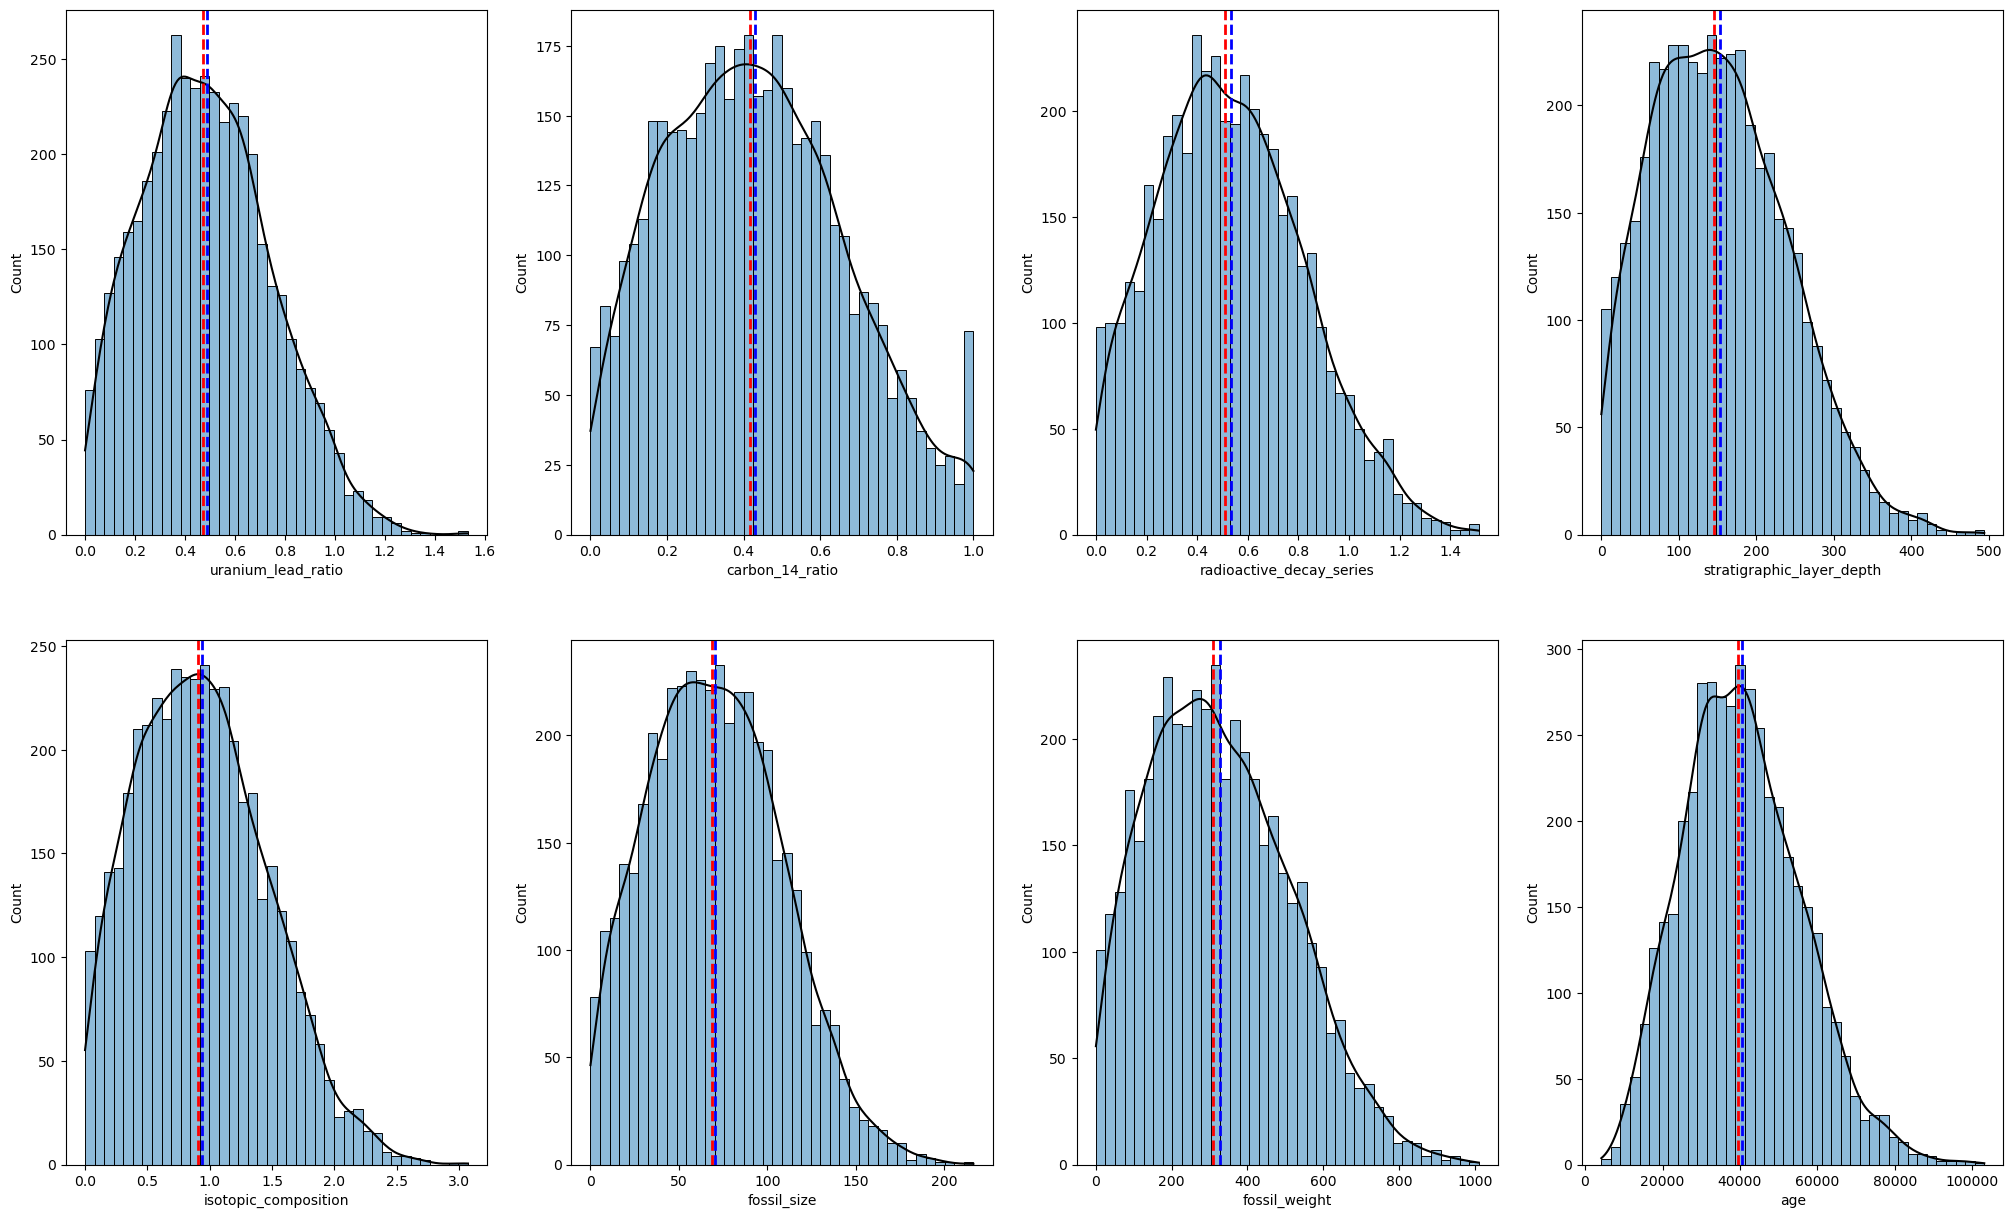

In [245]:
fig, ax = plt.subplots(2, 4, figsize = (25, 15))
ax = ax.ravel()
i = 0
for i, feature in enumerate(data_numericalFeatures):
    hist = sns.histplot(data = data, x = feature, bins = 40, kde = True, ax = ax[i])
    hist.lines[0].set_color('black')
    hist.axvline(x = data[feature].mean(), color = 'b', label = 'mean', linestyle = "--", linewidth = 2)
    hist.axvline(x = data[feature].median(), color = 'r', label = "median", linestyle = "--", linewidth = 2)

In [246]:
data.shape

(4398, 13)

#### Percentile using describe method

#### Remove the outliers

In [247]:
# outlier_features = ['uranium_lead_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition',
#                     'fossil_size', 'fossil_weight', 'age']
# outliers_shape = []
# for feature in outlier_features:
#     summary_states = data[feature].describe()
#     q75 = summary_states['75%']
#     q25 = summary_states['25%']
#     intr_qr = q75 - q25
#     Max = q75 + (1.5 * intr_qr)
#     outlier = data[data[feature] > Max]
#     outliers_shape.append(outlier.shape)
#     data = data[data[feature] <= Max]

#### Percentile using numpy

##### Remove the outliers

In [248]:
# outlier_features = ['uranium_lead_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition',
#                     'fossil_size', 'fossil_weight', 'age']
# outliers_shape = []
# for i in outlier_features:
#     q75, q25 = np.percentile(data[i], [75, 25])
#     intr_qr = q75 - q25
#     Max = q75 + (1.5 * intr_qr)
#     outlier = data[data[i] >= Max]
#     outliers_shape.append(outlier.shape)
#     data = data[data[i] <= Max]

##### Another way to remove the outliers

In [249]:
# data.loc[data[x] < Min, x] = np.nan
# data.loc[data[x] > Max, x] = np.nan

# data = data.dropna(axis = 0)
# data.reset_index(inplace = True)
# data.drop(['index'], axis = 1, inplace = True)

In [250]:
# for i in outliers_shape:
#     print(i)

In [251]:
# data.shape

#### boxplot after removing the outliers

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_10624\3476429711.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


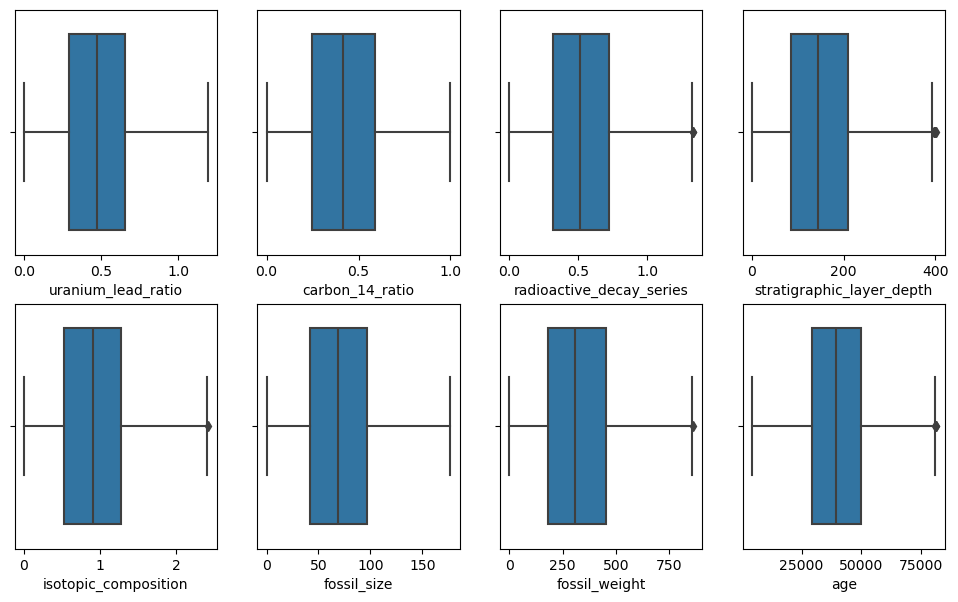

In [252]:
# fig, ax = plt.subplots(2, 4, figsize = (12, 7))
# ax = ax.ravel()

# for i, feature in enumerate(data_numericalFeatures):
#     sns.boxplot(x = feature, data = data, ax = ax[i])

### Randomize the train data

In [253]:
data = shuffle(data, random_state = 42)
data

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
1755,0.168821,0.394757,0.543200,25.95,Cambrian,Normal polarity,False,1.049632,Shale,Bottom,28.00,579.70,19017
1206,0.401184,0.508070,0.301636,109.55,Triassic,Normal polarity,True,0.863057,Conglomerate,Middle,46.45,588.32,29562
315,0.733908,0.116517,0.473576,274.82,Cambrian,Normal polarity,True,1.962585,Shale,Bottom,40.63,359.90,68295
1359,0.633935,0.950104,0.413138,275.18,Cambrian,Normal polarity,True,1.474202,Shale,Middle,25.32,103.75,56836
3999,0.765748,0.143365,1.122289,281.76,Jurassic,Normal polarity,True,1.630120,Conglomerate,Bottom,99.29,162.09,63446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,0.148217,0.711559,0.986238,221.81,Jurassic,Normal polarity,True,1.421992,Limestone,Bottom,72.37,265.86,30746
478,0.624569,0.588476,0.614922,102.60,Permian,Normal polarity,False,1.278202,Sandstone,Bottom,154.80,202.14,48223
3191,0.732162,0.229161,0.979957,221.76,Cambrian,Normal polarity,True,0.381921,Limestone,Bottom,77.39,487.02,65642
3888,0.712575,0.002843,0.708509,5.97,Triassic,Normal polarity,False,1.235244,Sandstone,Bottom,94.86,543.91,41633


### Split Data into X_train, y_train

In [254]:
X_train = data.drop("age", axis = 1)
y_train = data['age']

## Preprocessing train data

### Standarization

In [255]:
X_train_numericalFeatures = X_train.select_dtypes(exclude = ['object', 'bool']).columns.tolist()
# del numericalFeatures[-1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[X_train_numericalFeatures])

X_train[X_train_numericalFeatures] = X_train_scaled
X_train

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight
1755,-1.250061,-0.147130,0.055844,-1.486786,Cambrian,Normal polarity,False,0.233233,Shale,Bottom,-1.148832,1.393664
1206,-0.319346,0.339122,-0.799590,-0.491756,Triassic,Normal polarity,True,-0.131358,Conglomerate,Middle,-0.647374,1.440651
315,1.013367,-1.341126,-0.190711,1.475333,Cambrian,Normal polarity,True,2.017264,Shale,Bottom,-0.805557,0.195557
1359,0.612930,2.235992,-0.404734,1.479617,Cambrian,Normal polarity,True,1.062899,Shale,Middle,-1.221673,-1.200690
3999,1.140899,-1.225912,2.106529,1.557934,Jurassic,Normal polarity,True,1.367583,Conglomerate,Bottom,0.788782,-0.882685
...,...,...,...,...,...,...,...,...,...,...,...,...
3552,-1.332593,1.212341,1.624743,0.844393,Jurassic,Normal polarity,True,0.960874,Limestone,Bottom,0.057115,-0.317045
478,0.575412,0.684162,0.309827,-0.574477,Permian,Normal polarity,False,0.679889,Sandstone,Bottom,2.297507,-0.664377
3191,1.006372,-0.857741,1.602497,0.843798,Cambrian,Normal polarity,True,-1.071562,Limestone,Bottom,0.193555,0.888475
3888,0.927919,-1.828925,0.641239,-1.724593,Triassic,Normal polarity,False,0.595944,Sandstone,Bottom,0.668378,1.198577


### One-HOT-Encoding

In [256]:
X_train_categoryStrFeatures = data.select_dtypes(include = ['object', 'bool']).columns.tolist()
X_train_categoryStrFeatures

['geological_period',
 'paleomagnetic_data',
 'inclusion_of_other_fossils',
 'surrounding_rock_type',
 'stratigraphic_position']

#### Using pandas get_dummies

In [257]:
# X_train = pd.get_dummies(X_train, dtype = int)
# X_train.head()

#### Using sklearn OneHotEncoder

In [ ]:
type(x_train['geological_period'])

In [258]:

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
encoded_X_train = enc.fit_transform(X_train[X_train_categoryStrFeatures])
encoded_X_train = pd.DataFrame(encoded_X_train, columns = enc.get_feature_names_out(X_train_categoryStrFeatures), index = X_train.index)
X_train = pd.concat([X_train, encoded_X_train], axis = 1).drop(columns = X_train_categoryStrFeatures, axis = 1)
X_train.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,geological_period_Cambrian,geological_period_Carboniferous,geological_period_Cretaceous,...,paleomagnetic_data_Reversed polarity,inclusion_of_other_fossils_False,inclusion_of_other_fossils_True,surrounding_rock_type_Conglomerate,surrounding_rock_type_Limestone,surrounding_rock_type_Sandstone,surrounding_rock_type_Shale,stratigraphic_position_Bottom,stratigraphic_position_Middle,stratigraphic_position_Top
1755,-1.250061,-0.147130,0.055844,-1.486786,0.233233,-1.148832,1.393664,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1206,-0.319346,0.339122,-0.799590,-0.491756,-0.131358,-0.647374,1.440651,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
315,1.013367,-1.341126,-0.190711,1.475333,2.017264,-0.805557,0.195557,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1359,0.612930,2.235992,-0.404734,1.479617,1.062899,-1.221673,-1.200690,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3999,1.140899,-1.225912,2.106529,1.557934,1.367583,0.788782,-0.882685,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Include test data

In [259]:
test_data = pd.read_csv("./test_data.csv")

### Split the test data into X_test, y_test

In [260]:
X_test = test_data.drop("age", axis = 1)
y_test = test_data["age"]
X_test

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight
0,0.469986,1.000000,0.667595,29.58,Triassic,Normal polarity,False,0.583560,Limestone,Bottom,120.12,73.83
1,0.619865,0.474208,1.218381,69.87,Cretaceous,Reversed polarity,True,0.942719,Shale,Middle,72.82,191.68
2,0.767736,0.478731,0.119801,96.38,Cretaceous,Normal polarity,False,0.377531,Sandstone,Bottom,105.47,82.25
3,0.275121,0.400594,0.634760,134.10,Triassic,Normal polarity,True,0.323820,Sandstone,Middle,94.99,47.99
4,0.407470,0.039705,0.824597,124.10,Triassic,Normal polarity,False,1.219120,Shale,Middle,139.93,532.62
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.931041,0.605897,0.084256,305.88,Jurassic,Normal polarity,False,1.420604,Limestone,Bottom,71.73,457.19
1096,0.172815,0.735722,0.256501,74.91,Cretaceous,Normal polarity,False,1.060878,Shale,Top,90.10,231.71
1097,0.116292,0.328385,0.757881,178.98,Triassic,Normal polarity,True,0.756099,Sandstone,Middle,112.89,447.29
1098,0.199815,0.185976,0.461915,107.01,Triassic,Normal polarity,True,0.564300,Sandstone,Top,105.78,262.51


## Preprocessing test data

### Standardization

In [261]:
X_test_numericalFeatures = X_test.select_dtypes(exclude = ['object', 'bool']).columns.to_list()
X_test_scaled = scaler.transform(X_test[X_test_numericalFeatures])
X_test[X_test_numericalFeatures] = X_test_scaled


### One-Hot Encoding

In [262]:
X_test_categoryStrFeatures = X_test.select_dtypes(include = ['object', 'bool']).columns.to_list()

In [263]:
encoded_X_test = enc.transform(X_test[X_test_categoryStrFeatures])
encoded_X_test = pd.DataFrame(encoded_X_test, columns = enc.get_feature_names_out(X_test_categoryStrFeatures), index = X_test.index)
X_test = pd.concat([X_test, encoded_X_test], axis = 1).drop(columns = X_test_categoryStrFeatures, axis = 1)
X_test.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,geological_period_Cambrian,geological_period_Carboniferous,geological_period_Cretaceous,...,paleomagnetic_data_Reversed polarity,inclusion_of_other_fossils_False,inclusion_of_other_fossils_True,surrounding_rock_type_Conglomerate,surrounding_rock_type_Limestone,surrounding_rock_type_Sandstone,surrounding_rock_type_Shale,stratigraphic_position_Bottom,stratigraphic_position_Middle,stratigraphic_position_Top
0,-0.043762,2.450109,0.496353,-1.443581,-0.677534,1.354928,-1.363781,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.556572,0.193810,2.446814,-0.964038,0.024310,0.069345,-0.721393,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.148860,0.213220,-1.443507,-0.648509,-1.080142,0.956751,-1.317885,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.824282,-0.122085,0.380077,-0.199555,-1.185100,0.671911,-1.504633,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.294164,-1.670745,1.052333,-0.318578,0.564435,1.893350,1.137036,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Applying Linear Regression Model

In [264]:
LinearRegressionModel = LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train, )

#Calculating Details
# see if there is a big difference between accuracy train_data and test_data
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
#print('Predicted Value for Linear Regression is : ' , y_pred[:10])
y_test.shape, y_pred.shape, X_test.shape

Linear Regression intercept is :  4.20478573577684e+16


((1100,), (1100,), (1100, 29))

In [265]:
y_test

0       41072
1       42085
2       50436
3       25923
4       30272
        ...  
1095    75666
1096    17040
1097    19337
1098    18526
1099    32230
Name: age, Length: 1100, dtype: int64

In [266]:
y_pred

array([38816., 42440., 50896., ..., 17864., 15240., 35424.])

y_pred_outliersRemoved = array([38816., 42440., 50896., ..., 17864., 15240., 35424.])

In [267]:
X_test.shape, y_test.shape

((1100, 29), (1100,))

In [268]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  3689068.941818182


In [269]:
# MSEValue = mean_squared_error(y_test, y_pred, multioutput='raw_values') # it can be 'uniform_average'
# print('Mean Squared Error Value is : ', MSEValue)

In [270]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  1493.9927272727273


In [271]:
R2_value = r2_score(y_test, y_pred)
R2_value

0.9848148154542008

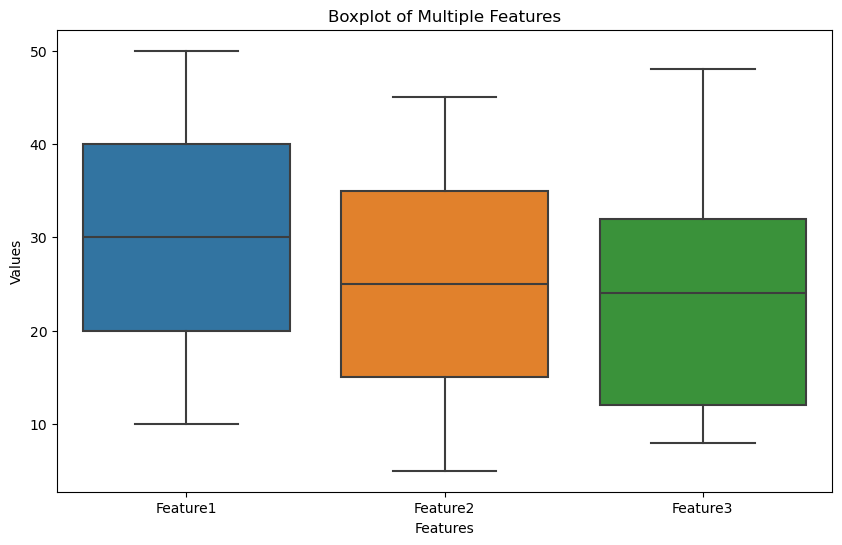

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (you can replace this with your own dataset)
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 15, 25, 35, 45],
    'Feature3': [8, 12, 24, 32, 48]
}

df = pd.DataFrame(data)

# Melt the dataframe to long format (if needed)
df_melted = pd.melt(df)

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()
